# Human Single Neuron Recordings

The purpose of this script is to analyze single neuron recordings in a human. \
The data contains neuropixel recordings from one human. Containing 384 units "neurons" at 2500(LFP) - 30,000(AP) samples per second over 833 seconds. It has action potential bands, cleaned action potential bands, as well as cleaned Local Field Potential Data. 

The data set can be dowloaded at https://dandiarchive.org/dandiset/000397?search=neuropixel&page=1&sortOption=3&sortDir=1&showDrafts=true&showEmpty=false&pos=2. \
The data overview can be found at https://datadryad.org/stash/dataset/doi:10.5061/dryad.d2547d840. 
- "Data included from:
Participant Pt. 01, Neuropixels recording during a procedure for deep brain stimulation (DBS) surgery for treatment of a movement disorder, participant under generalized anesthesia; recording from right dorsolateral prefrontal cortex. "
- The data is collected from the dorsolateral prefrontal cortex.

The technical report on the recording can be found at https://www.nature.com/articles/s41593-021-00997-0. \
Overview of LFP https://www.youtube.com/watch?v=PwkYgrTE2fU. \
Overview of spike sorting https://www.youtube.com/watch?v=8xeC5CV4UB8&t=1711s.

In [ ]:
!git pull https://github.com/RayCarpenterIII/Neuropixel-Analysis.git

In [1]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the NWB file.
io = NWBHDF5IO('sub-Pt01_ecephys.nwb', mode='r')
nwb = io.read()

# Visualize what the NWB file contains.
nwb2widget(nwb)

In [2]:
# List what is in the file.
nwb.fields

{'session_description': 'Auto-generated by neuroconv',
 'identifier': 'baa38cb2-cc9c-4c26-b93a-5e1426789c74',
 'session_start_time': datetime.datetime(1900, 1, 1, 0, 0, tzinfo=tzoffset(None, -18000)),
 'timestamps_reference_time': datetime.datetime(1900, 1, 1, 0, 0, tzinfo=tzoffset(None, -18000)),
 'file_create_date': [datetime.datetime(2022, 11, 29, 12, 45, 36, 602182, tzinfo=tzoffset(None, -28800))],
 'acquisition': {'ElectricalSeriesLFP': ElectricalSeriesLFP pynwb.ecephys.ElectricalSeries at 0x2255016965072
  Fields:
    comments: no comments
    conversion: 4.6875e-06
    data: <HDF5 dataset "data": shape (2084558, 384), type "<i2">
    description: LFP traces for the processed (lf) SpikeGLX data.
    electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
    offset: 0.0
    rate: 2500.0
    resolution: -1.0
    starting_time: 0.0
    starting_time_unit: seconds
    unit: volts,
  'ElectricalSeriesRaw': ElectricalSeriesRaw pynwb.ecephys.ElectricalSeries at 0x22550169

In [3]:
# Put information about each recording electrode into a dataframe.
electrodes = nwb.electrodes.to_dataframe()
# How many electrodes are there?
print(electrodes.shape[0])
# Show information about each recording electrode.
electrodes

768


,location,group,group_name,channel_name,inter_sample_shift,gain_to_uV,rel_x,offset_to_uV,rel_y,shank_electrode_number,contact_shapes
id,,,,,,,,,,,
0,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,AP0,0.000000,2.34375,16.0,0.0,0.0,0.0,square
1,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,AP1,0.000000,2.34375,48.0,0.0,0.0,1.0,square
2,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,AP2,0.083333,2.34375,0.0,0.0,20.0,2.0,square
3,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,AP3,0.083333,2.34375,32.0,0.0,20.0,3.0,square
4,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,AP4,0.166667,2.34375,16.0,0.0,40.0,4.0,square
...,...,...,...,...,...,...,...,...,...,...,...
763,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,LF379,0.750000,4.68750,32.0,0.0,3780.0,379.0,square
764,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,LF380,0.833333,4.68750,16.0,0.0,3800.0,380.0,square
765,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x225501696...,s0,LF381,0.833333,4.68750,48.0,0.0,3800.0,381.0,square


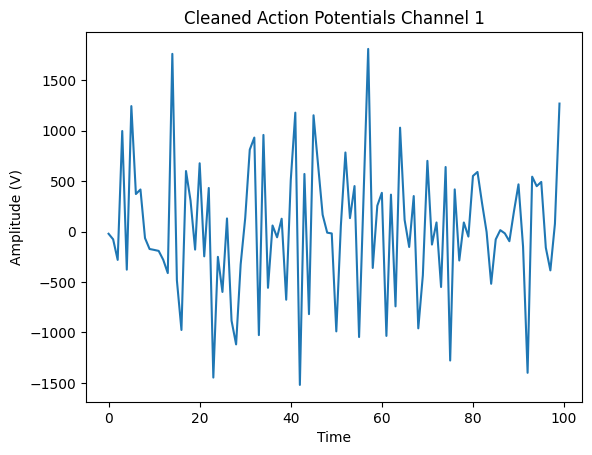

In [4]:
# plot the first channel
ap = pd.read_csv('cleanedAP_P0_cut.csv')

plt.plot(ap.iloc[:100, 0])
plt.xlabel('Time')
plt.ylabel('Amplitude (V)')
plt.title(f'Cleaned Action Potentials Channel 1')
plt.show()

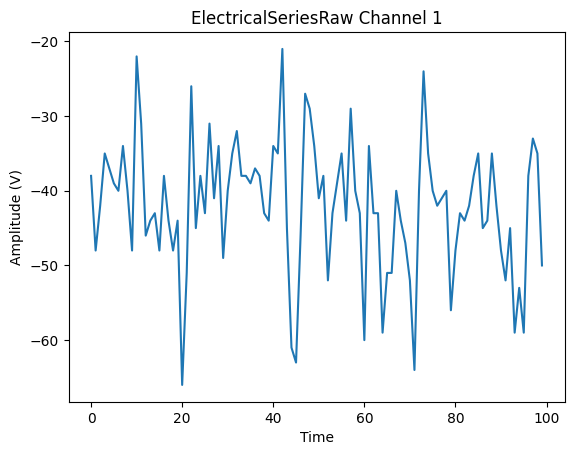

In [5]:
# Get the ElectricalSeriesRaw object and describe it.
electrical_series_raw = nwb.acquisition['ElectricalSeriesRaw']
electrical_series_raw

# plot the first channel
channel_1_data = electrical_series_raw.data[:100, 0]
plt.plot(channel_1_data)
plt.xlabel('Time')
plt.ylabel('Amplitude (V)')
plt.title(f'ElectricalSeriesRaw Channel 1')
plt.show()


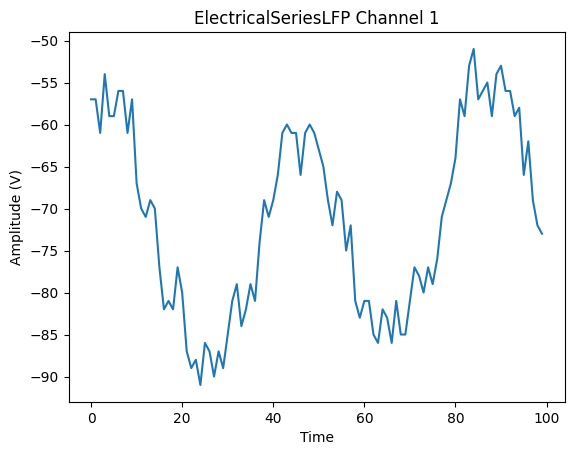

In [6]:
# get the ElectricalSeriesLFP object
electrical_series_lfp = nwb.acquisition['ElectricalSeriesLFP']

# plot the first channel
channel_1_data = electrical_series_lfp.data[:100, 0]
plt.plot(channel_1_data)
plt.xlabel('Time')
plt.ylabel('Amplitude (V)')
plt.title(f'ElectricalSeriesLFP Channel 1')
plt.show()


In [7]:
# Open .bin file and put it into a dataframe.

'''
with open('Pt01_aligned_0.bin', 'rb') as f:
    data = f.read

num_channels = 384
arr = np.frombuffer(data, dtype=np.int16).reshape(-1, num_channels)

col_names = ['channel{}'.format(i) for i in range(1, num_channels+1)]
df = pd.DataFrame(arr, columns=col_names)
df
'''

"\nwith open('Pt01_aligned_0.bin', 'rb') as f:\n    data = f.read\n\nnum_channels = 384\narr = np.frombuffer(data, dtype=np.int16).reshape(-1, num_channels)\n\ncol_names = ['channel{}'.format(i) for i in range(1, num_channels+1)]\ndf = pd.DataFrame(arr, columns=col_names)\ndf\n"

In [8]:
# Save a copy
'''
df2 = df.copy()
df2 = df.iloc[:10,:]

df2.to_csv('cleanedAP_P0_cut.csv', index=False)
'''

"\ndf2 = df.copy()\ndf2 = df.iloc[:10,:]\n\ndf2.to_csv('cleanedAP_P0_cut.csv', index=False)\n"